# Numpy (tableaux de données multi-dimensionnels) et matplotlib (visualisation en 2D et 3D pour Python)

    Slim Essid : slim.essid@telecom-paristech.fr
    Alexandre Gramfort : alexandre.gramfort@telecom-paristech.fr

adapté du travail de J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/

In [189]:
# et JUSTE POUR MOI (pour avoir les figures dans le notebook)
%matplotlib inline

## Introduction

 

* `numpy` est un module utilisé dans presque tous les projets de calcul numérique sous Python
   * Il fournit des structures de données performantes pour la manipulation de vecteurs, matrices et tenseurs plus généraux
   * `numpy` est écrit en C et en Fortran d'où ses performances élevées lorsque les calculs sont vectorisés (formulés comme des opérations sur des vecteurs/matrices)

 * `matplotlib` est un module performant pour la génération de graphiques en 2D et 3D
   * syntaxe très proche de celle de Matlab
   * supporte texte et étiquettes en $\LaTeX$
   * sortie de qualité dans divers formats (PNG, PDF, SV, EPS...)
   * interface graphique intéractive pour explorer les figures
 
* `guiqwt.pyplot` est une alternative intéressante qui reprend la syntaxe de `matplotlib` (plus récente, encore peu utilisée)

Pour utiliser `numpy` et `matplotlib` il faut commencer par les importer :

In [190]:
import numpy as np
import matplotlib.pyplot as plt

On peut plus simplement faire :

In [191]:
from numpy import *
from matplotlib.pyplot import *

## *Arrays* `numpy`

Dans la terminologie `numpy`, vecteurs, matrices et autres tenseurs sont appelés *arrays*.


## Création d'*arrays* `numpy` 

Plusieurs possibilités:

 * a partir de listes ou n-uplets Python
 * en utilisant des fonctions dédiées, telles que `arange`, `linspace`, etc.
 * par chargement à partir de fichiers

### A partir de listes

Au moyen de la fonction `numpy.array` :


In [192]:
# un vecteur: l'argument de la fonction est une liste Python
v = np.array([1, 3, 2, 4])
print v
print type(v)

[1 3 2 4]
<type 'numpy.ndarray'>


On peut alors visualiser ces données :

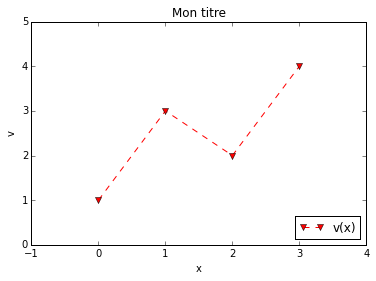

In [193]:
v = np.array([1, 3, 2, 4])
x = np.array([0, 1, 2, 3])

plt.figure()
plt.plot(x,v, 'rv--', label='v(x)')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('v')
plt.title('Mon titre')
plt.xlim([-1, 4])
plt.ylim([0, 5])
plt.show()
plt.savefig('toto.png')

On peut omettre `show()`, lorsque la méthode `ion()` a été appelée ; c'est le cas dans Spyder et pylab

Pour définir une matrice (array de dimension 2 pour numpy):


In [194]:
# une matrice: l'argument est une liste emboitée
M = np.array([[1, 2], [3, 4]])
print M

[[1 2]
 [3 4]]


In [195]:
M[0, 0]

1

Les objets `v` et `M` sont tous deux du type `ndarray` (fourni par `numpy`)

In [196]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

`v` et `M` ne diffèrent que par leur taille, que l'on peut obtenir via la propriété `shape` :

In [197]:
v.shape

(4,)

In [198]:
M.shape

(2, 2)

Pour obtenir le nombre d'éléments d'un *array* :

In [199]:
v.size

4

In [200]:
M.size

4

On peut aussi utiliser `numpy.shape` et `numpy.size`

In [201]:
np.shape(M)

(2, 2)

Les *arrays* ont un type qu'on obtient via `dtype`:

In [202]:
print M
print M.dtype

[[1 2]
 [3 4]]
int64


Les types doivent être respectés lors d'assignations à des *arrays*

In [203]:
M[0,0] = "hello"

ValueError: invalid literal for long() with base 10: 'hello'

### Attention !

In [204]:
a = np.array([1,2,3])
a[0] = 3.2
print a
a.dtype

[3 2 3]


dtype('int64')

In [205]:
a = np.array([1,2,3], dtype=np.int64)
b = np.array([2,2,3], dtype=np.int64)
b = b.astype(float)
print a / b

[ 0.5  1.   1. ]


On peut définir le type de manière explicite en utilisant le mot clé `dtype` en argument: 

In [206]:
M = np.array([[1, 2], [3, 4]], dtype=complex)
M

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

 * Autres types possibles avec `dtype` : `int`, `float`, `complex`, `bool`, `object`, etc.

 * On peut aussi spécifier la précision en bits: `int64`, `int16`, `float128`, `complex128`.

### Utilisation de fonction de génération d'*arrays*

#### arange

In [207]:
# create a range
x = np.arange(0, 10, 2) # arguments: start, stop, step
x

array([0, 2, 4, 6, 8])

In [208]:
x = np.arange(-1, 1, 0.1)
x

array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
        -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
        -4.00000000e-01,  -3.00000000e-01,  -2.00000000e-01,
        -1.00000000e-01,  -2.22044605e-16,   1.00000000e-01,
         2.00000000e-01,   3.00000000e-01,   4.00000000e-01,
         5.00000000e-01,   6.00000000e-01,   7.00000000e-01,
         8.00000000e-01,   9.00000000e-01])

#### linspace and logspace

In [209]:
# avec linspace, le début et la fin SONT inclus
np.linspace(0, 10, 25)

array([  0.        ,   0.41666667,   0.83333333,   1.25      ,
         1.66666667,   2.08333333,   2.5       ,   2.91666667,
         3.33333333,   3.75      ,   4.16666667,   4.58333333,
         5.        ,   5.41666667,   5.83333333,   6.25      ,
         6.66666667,   7.08333333,   7.5       ,   7.91666667,
         8.33333333,   8.75      ,   9.16666667,   9.58333333,  10.        ])

In [210]:
np.linspace(0, 10, 11)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

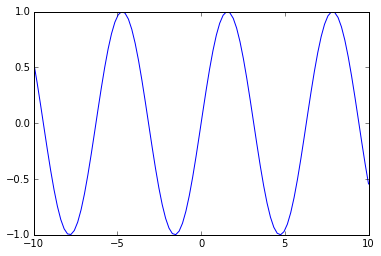

In [211]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, np.sin(xx))

In [212]:
print np.logspace(0, 10, 10, base=np.e)

[  1.00000000e+00   3.03773178e+00   9.22781435e+00   2.80316249e+01
   8.51525577e+01   2.58670631e+02   7.85771994e+02   2.38696456e+03
   7.25095809e+03   2.20264658e+04]


#### mgrid

In [213]:
x, y = np.mgrid[0:5, 0:5] 

In [214]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [215]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

<matplotlib.colorbar.Colorbar instance at 0x113114440>

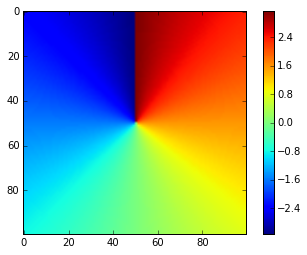

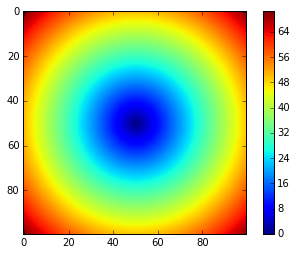

In [216]:
xx, yy = np.mgrid[-50:50, -50:50] 
plt.imshow(np.angle(xx + 1j*yy))
plt.axis('on')
plt.colorbar()
plt.figure()
plt.imshow(np.abs(xx + 1j*yy))
plt.axis('on')
plt.colorbar()

#### Données aléatoires

In [217]:
from numpy import random

In [218]:
# tirage uniforme dans [0,1]
random.rand(5,5)  # ou np.random.rand

array([[ 0.82041634,  0.70639963,  0.46385853,  0.44582479,  0.54707122],
       [ 0.42292826,  0.99162372,  0.98653975,  0.97610487,  0.47520573],
       [ 0.94607633,  0.3463793 ,  0.93061287,  0.52587568,  0.40974236],
       [ 0.38184142,  0.78051931,  0.24226112,  0.68618058,  0.97339603],
       [ 0.41849313,  0.41744206,  0.44326999,  0.29200726,  0.87182425]])

In [219]:
# tirage suivant une loi normale standard
random.randn(5,5)

array([[-0.57522405, -0.29637627,  0.51579288,  0.98295884,  1.03580985],
       [-1.36337807,  0.34720125, -0.78175767,  0.47247655,  2.02702676],
       [-0.27608453,  1.08472117, -0.73004318,  1.75461909, -0.89328533],
       [ 0.08476248,  0.95410938, -0.75631847, -0.43575162, -1.1635937 ],
       [-0.11394068,  0.53859002,  0.02190039,  1.21787263,  0.81275218]])

Affichage de l'histogramme des tirages

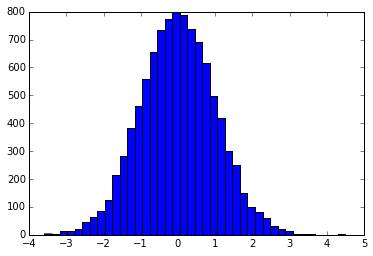

In [220]:
a = random.randn(10000)
hh = plt.hist(a, 40)

#### diag

In [221]:
# une matrice diagonale
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [222]:
# diagonale avec décalage par rapport à la diagonale principale
np.diag([1,2,3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros et ones

In [223]:
np.zeros((3,), dtype=int)  # attention zeros(3,3) est FAUX

array([0, 0, 0])

In [224]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [225]:
print np.zeros((3,), dtype=int)
print np.zeros((1, 3), dtype=int)
print np.zeros((3, 1), dtype=int)

[0 0 0]
[[0 0 0]]
[[0]
 [0]
 [0]]


##  Fichiers d'E/S

### Fichiers séparés par des virgules (CSV)

Un format fichier classique est le format CSV (comma-separated values), ou bien TSV (tab-separated values). Pour lire de tels fichiers utilisez `numpy.genfromtxt`. Par exemple:

In [226]:
!cat data.csv

1,2,3,4,5
6,7,8,9,10
1,3,3,4,6
1,2,3,4,20

In [227]:
data = np.genfromtxt('data.csv', delimiter=',')
data

array([[  1.,   2.,   3.,   4.,   5.],
       [  6.,   7.,   8.,   9.,  10.],
       [  1.,   3.,   3.,   4.,   6.],
       [  1.,   2.,   3.,   4.,  20.]])

In [228]:
data.shape

(4, 5)

A l'aide de `numpy.savetxt` on peut enregistrer un *array* `numpy` dans un fichier txt:

In [229]:
M = random.rand(3,3)
M

array([[ 0.72967849,  0.00249749,  0.18741399],
       [ 0.46990244,  0.35666352,  0.35690542],
       [ 0.02307466,  0.73473901,  0.40844975]])

In [230]:
np.savetxt("random-matrix.txt", M)

In [231]:
!cat random-matrix.txt
#!type random-matrix.txt

7.296784939925013980e-01 2.497493328533662016e-03 1.874139948916148102e-01
4.699024446071319305e-01 3.566635206234958222e-01 3.569054152291329940e-01
2.307465861113211503e-02 7.347390125564122743e-01 4.084497492043788203e-01


In [232]:
np.savetxt("random-matrix.csv", M, fmt='%.5f', delimiter=',') # fmt spécifie le format

!cat random-matrix.csv
#!type random-matrix.csv

0.72968,0.00250,0.18741
0.46990,0.35666,0.35691
0.02307,0.73474,0.40845


### Format de fichier Numpy natif

Pour sauvegarder et recharger des *array* `numpy` : `numpy.save` et `numpy.load` :

In [233]:
np.save("random-matrix.npy", M)

!cat random-matrix.npy

�NUMPY F {'descr': '<f8', 'fortran_order': False, 'shape': (3, 3), }          
�Z���Y�? �`��ud?$�o�.��?2z����?�C0;���?�)�ω��? �g ⠗?���c���?��j
$�?

In [234]:
np.load("random-matrix.npy")

array([[ 0.72967849,  0.00249749,  0.18741399],
       [ 0.46990244,  0.35666352,  0.35690542],
       [ 0.02307466,  0.73473901,  0.40844975]])

## Autres propriétés des *arrays* `numpy`

In [235]:
M

array([[ 0.72967849,  0.00249749,  0.18741399],
       [ 0.46990244,  0.35666352,  0.35690542],
       [ 0.02307466,  0.73473901,  0.40844975]])

In [236]:
M.dtype

dtype('float64')

In [237]:
M.itemsize # octets par élément

8

In [238]:
M.nbytes # nombre d'octets

72

In [239]:
M.nbytes / M.size

8

In [240]:
M.ndim # nombre de dimensions

2

In [241]:
print np.zeros((3,), dtype=int).ndim
print np.zeros((1, 3), dtype=int).ndim
print np.zeros((3, 1), dtype=int).ndim

1
2
2


## Manipulation d'*arrays*

### Indexation

In [242]:
# v est un vecteur, il n'a qu'une seule dimension -> un seul indice
v[0]

1

In [243]:
# M est une matrice, ou un array à 2 dimensions -> deux indices 
M[1,1]

0.35666352062349582

Contenu complet :

In [244]:
M

array([[ 0.72967849,  0.00249749,  0.18741399],
       [ 0.46990244,  0.35666352,  0.35690542],
       [ 0.02307466,  0.73473901,  0.40844975]])

La deuxième ligne :

In [245]:
M[1]

array([ 0.46990244,  0.35666352,  0.35690542])

On peut aussi utiliser `:` 

In [246]:
M[1,:] # 2 ème ligne (indice 1)

array([ 0.46990244,  0.35666352,  0.35690542])

In [247]:
M[:,1] # 2 ème colonne (indice 1)

array([ 0.00249749,  0.35666352,  0.73473901])

In [248]:
print M.shape
print M[1,:].shape, M[:,1].shape

(3, 3)
(3,) (3,)


On peut assigner des nouvelles valeurs à certaines cellules :

In [249]:
M[0,0] = 1

In [250]:
M

array([[ 1.        ,  0.00249749,  0.18741399],
       [ 0.46990244,  0.35666352,  0.35690542],
       [ 0.02307466,  0.73473901,  0.40844975]])

In [251]:
# on peut aussi assigner des lignes ou des colonnes
M[1,:] = -1
# M[1,:] = [1, 2, 3]

In [252]:
M

array([[ 1.        ,  0.00249749,  0.18741399],
       [-1.        , -1.        , -1.        ],
       [ 0.02307466,  0.73473901,  0.40844975]])

## *Slicing* ou accès par tranches

*Slicing* fait référence à la syntaxe `M[start:stop:step]` pour extraire une partie d'un *array* :

In [253]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [254]:
A[1:3]

array([2, 3])

Les tranches sont modifiables :

In [255]:
A[1:3] = [-2,-3]
A

array([ 1, -2, -3,  4,  5])

On peut omettre n'importe lequel des argument dans `M[start:stop:step]`:

In [256]:
A[::] # indices de début, fin, et pas avec leurs valeurs par défaut

array([ 1, -2, -3,  4,  5])

In [257]:
A[::2] # pas = 2, indices de début et de fin par défaut

array([ 1, -3,  5])

In [258]:
A[:3] # les trois premiers éléments

array([ 1, -2, -3])

In [259]:
A[3:] # à partir de l'indice 3

array([4, 5])

In [260]:
M = np.arange(12).reshape(4, 3)
print M

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


On peut utiliser des indices négatifs :

In [261]:
A = np.array([1,2,3,4,5])

In [262]:
A[-1] # le dernier élément

5

In [263]:
A[-3:] # les 3 derniers éléments

array([3, 4, 5])

Le *slicing* fonctionne de façon similaire pour les *array* multi-dimensionnels

In [264]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [265]:
A[1:4, 1:4]  # sous-tableau

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [266]:
# sauts
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

In [267]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [268]:
A[[0, 1, 3]]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [30, 31, 32, 33, 34]])

### Indexation avancée (*fancy indexing*)

Lorsque qu'on utilise des listes ou des *array* pour définir des tranches : 

In [269]:
row_indices = [1, 2, 3]
print A
print A[row_indices]
# print A.shape

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


In [270]:
A[[1, 2]][:, [3, 4]] = 0  # ATTENTION !
print A

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [271]:
print A[[1, 2], [3, 4]]

[13 24]


In [272]:
A[np.ix_([1, 2], [3, 4])] = 0
print A

[[ 0  1  2  3  4]
 [10 11 12  0  0]
 [20 21 22  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]


On peut aussi utiliser des masques binaires :

In [273]:
B = np.arange(5)
B

array([0, 1, 2, 3, 4])

In [274]:
row_mask = np.array([True, False, True, False, False])
print B[row_mask]
print B[[0,2]]

[0 2]
[0 2]


In [275]:
# de façon équivalente
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

In [276]:
# ou encore
a = np.array([1, 2, 3, 4, 5])
print a < 3
print B[a < 3]

[ True  True False False False]
[0 1]


In [277]:
print A
print A[:, a < 3]

[[ 0  1  2  3  4]
 [10 11 12  0  0]
 [20 21 22  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[ 0  1]
 [10 11]
 [20 21]
 [30 31]
 [40 41]]


## Extraction de données à partir d'*arrays* et création d'*arrays*

#### where

Un masque binaire peut être converti en indices de positions avec `where`

In [278]:
x = np.arange(0, 10, 0.5)
print x
mask = (x > 5) * (x < 7.5)
print mask
indices = np.where(mask)
indices

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]
[False False False False False False False False False False False  True
  True  True  True False False False False False]


(array([11, 12, 13, 14]),)

In [279]:
x[indices] # équivalent à x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

#### diag

Extraire la diagonale ou une sous-diagonale d'un *array* :

In [280]:
print A
np.diag(A)

[[ 0  1  2  3  4]
 [10 11 12  0  0]
 [20 21 22  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]


array([ 0, 11, 22, 33, 44])

In [281]:
np.diag(A, -1)

array([10, 21, 32, 43])

## Algèbre linéaire

La performance des programmes écrit en Python/Numpy dépend de la capacité à vectoriser les calculs (les écrire comme des opérations sur des vecteurs/matrices) en évitant au maximum les boucles `for/while`


### Opérations scalaires

On peut effectuer les opérations arithmétiques habituelles pour multiplier, additionner, soustraire et diviser des *arrays* avec/par des scalaires :

In [282]:
v1 = np.arange(0, 5)
print v1

[0 1 2 3 4]


In [283]:
v1 * 2

array([0, 2, 4, 6, 8])

In [284]:
v1 + 2

array([2, 3, 4, 5, 6])

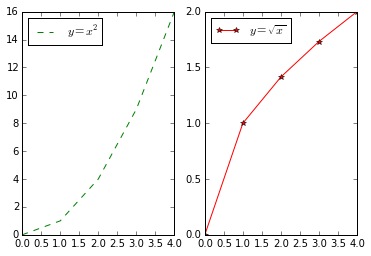

In [285]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(v1 ** 2,'g--', label='$y = x^2$')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(sqrt(v1), 'r*-', label='$y = \sqrt{x}$')
plt.legend(loc=2)
plt.show()

In [286]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
print A

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [287]:
print A * 2

[[ 0  2  4  6  8]
 [20 22 24 26 28]
 [40 42 44 46 48]
 [60 62 64 66 68]
 [80 82 84 86 88]]


In [288]:
print A + 2

[[ 2  3  4  5  6]
 [12 13 14 15 16]
 [22 23 24 25 26]
 [32 33 34 35 36]
 [42 43 44 45 46]]


### Visualiser des matrices

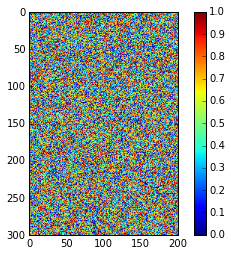

In [289]:
C = random.rand(300,200)
plt.figure()
plt.imshow(C)
plt.colorbar()
plt.show()

### Opérations terme-à-terme sur les *arrays*

Les opérations par défaut sont des opérations **terme-à-terme** :

In [290]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
print A

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [291]:
A * A # multiplication terme-à-terme

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [292]:
(A + A.T) / 2

array([[ 0,  5, 11, 16, 22],
       [ 5, 11, 16, 22, 27],
       [11, 16, 22, 27, 33],
       [16, 22, 27, 33, 38],
       [22, 27, 33, 38, 44]])

In [293]:
print v1
print v1 * v1

[0 1 2 3 4]
[ 0  1  4  9 16]


En multipliant des *arrays* de tailles compatibles, on obtient des multiplications terme-à-terme par ligne :

In [294]:
A.shape, v1.shape

((5, 5), (5,))

In [295]:
print A
print v1
print A * v1

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[0 1 2 3 4]
[[  0   1   4   9  16]
 [  0  11  24  39  56]
 [  0  21  44  69  96]
 [  0  31  64  99 136]
 [  0  41  84 129 176]]


### Exercice:

Sans utiliser de boucles (`for/while`) :

 * Créer une matrice (5x6) aléatoire
 * Remplacer une colonne sur deux par sa valeur moins le double de la colonne suivante
 * Remplacer les valeurs négatives par 0 en utilisant un masque binaire


### Algèbre matricielle

Comment faire des multiplications de matrices ? Deux façons :
 
 * en utilisant les fonctions `dot`; 
 * en utiliser le type `matrix`.


In [296]:
print A.shape
print A
print type(A)

(5, 5)
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
<type 'numpy.ndarray'>


In [297]:
print np.dot(A, A)  # multiplication matrice
print A * A  # multiplication élément par élément

[[ 300  310  320  330  340]
 [1300 1360 1420 1480 1540]
 [2300 2410 2520 2630 2740]
 [3300 3460 3620 3780 3940]
 [4300 4510 4720 4930 5140]]
[[   0    1    4    9   16]
 [ 100  121  144  169  196]
 [ 400  441  484  529  576]
 [ 900  961 1024 1089 1156]
 [1600 1681 1764 1849 1936]]


In [298]:
A.dot(v1)

array([ 30, 130, 230, 330, 430])

In [299]:
np.dot(v1, v1)

30

Avec le type `matrix` de Numpy

In [300]:
M = np.matrix(A)
v = np.matrix(v1).T # en faire un vecteur colonne

In [301]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [302]:
# produit scalaire
v.T * v

matrix([[30]])

In [303]:
# avec les objets matrices, c'est les opérations standards sur les matrices qui sont appliquées
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

Si les dimensions sont incompatibles on provoque des erreurs :

In [304]:
v = np.matrix([1,2,3,4,5,6]).T

In [305]:
np.shape(M), np.shape(v)

((5, 5), (6, 1))

In [306]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

Voir également les fonctions : `inner`, `outer`, `cross`, `kron`, `tensordot`. Utiliser par exemple `help(kron)`.

### Transformations d'*arrays* ou de matrices

 * Plus haut `.T` a été utilisé pour transposer l'objet matrice `v`
 * On peut aussi utiliser la fonction `transpose`

**Autres transformations :**


In [307]:
C = np.matrix([[1j, 2j], [3j, 4j]])
C

matrix([[ 0.+1.j,  0.+2.j],
        [ 0.+3.j,  0.+4.j]])

In [308]:
np.conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

Transposée conjuguée :

In [309]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

Parties réelles et imaginaires :

In [310]:
np.real(C) # same as: C.real

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [311]:
np.imag(C) # same as: C.imag

matrix([[ 1.,  2.],
        [ 3.,  4.]])

Argument et module :

In [312]:
np.angle(C+1) 

array([[ 0.78539816,  1.10714872],
       [ 1.24904577,  1.32581766]])

In [313]:
np.abs(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

### Caclul matriciel

### Analyse de données

Numpy propose des fonctions pour calculer certaines statistiques des données stockées dans des *arrays* :

In [314]:
data = np.vander([1, 2, 3, 4])
print data
print data.shape

[[ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]
 [64 16  4  1]]
(4, 4)


#### mean

In [315]:
# np.mean(data)
print np.mean(data, axis=0)

[ 25.    7.5   2.5   1. ]


In [316]:
# la moyenne de la troisième colonne
np.mean(data[:,2])

2.5

#### variance et écart type

In [317]:
np.var(data[:,2]), np.std(data[:,2])

(1.25, 1.1180339887498949)

#### min et max

In [318]:
data[:,2].min()

1

In [319]:
data[:,2].max()

4

In [320]:
data[:,2].sum()

10

In [321]:
data[:,2].prod()

24

#### sum, prod, et trace

In [322]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [323]:
# somme des éléments
np.sum(d)

45

ou encore :

In [324]:
d.sum()

45

In [325]:
# produit des éléments
np.prod(d+1)

3628800

In [326]:
# somme cumulée
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [327]:
# produit cumulé
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [328]:
# équivalent à diag(A).sum()
np.trace(data)

9

## EXERCICE :

Calculer une approximation de $\pi$ par la formule de Wallis sans boucle `for` avec Numpy

<!-- <img src="files/images/spyder-screenshot.jpg" width="800"> -->
<img src="http://scipy-lectures.github.io/_images/math/31913b3982be13ed2063b0ffccbcab9cf4931fdb.png" width="200">

### Calculs avec parties d'*arrays*

en utilisant l'indexation ou n'importe quelle méthode d'extraction de donnés à partir des *arrays*

In [329]:
data

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

In [330]:
np.unique(data[:,1]) 

array([ 1,  4,  9, 16])

In [331]:
mask = data[:,1] == 4

In [332]:
np.mean(data[mask,3])

1.0

### Calculs aves données multi-dimensionnelles

Pour appliquer `min`, `max`, etc., par lignes ou colonnes :

In [333]:
m = random.rand(3,4)
m

array([[ 0.17498666,  0.52616848,  0.1664185 ,  0.29014544],
       [ 0.96804331,  0.08603597,  0.86961338,  0.32603603],
       [ 0.15459771,  0.44573253,  0.42095918,  0.02844638]])

In [334]:
# max global 
m.max()

0.96804331005882194

In [335]:
# max dans chaque colonne
m.max(axis=0)

array([ 0.96804331,  0.52616848,  0.86961338,  0.32603603])

In [336]:
# max dans chaque ligne
m.max(axis=1)

array([ 0.52616848,  0.96804331,  0.44573253])

Plusieurs autres méthodes des classes `array` et `matrix` acceptent l'argument (optional) `axis` keyword argument.

## Copy et "deep copy"

Pour des raisons de performance Python ne copie pas automatiquement les objets (par exemple passage par référence des paramètres de fonctions).

In [337]:
A = np.array([[0,  2],[ 3,  4]])
A

array([[0, 2],
       [3, 4]])

In [338]:
B = A

In [339]:
# changer B affecte A
B[0,0] = 10
B

array([[10,  2],
       [ 3,  4]])

In [340]:
A

array([[10,  2],
       [ 3,  4]])

In [341]:
B = A
print B is A

True


Pour éviter ce comportement, on peut demander une *copie profonde* (*deep copy*) de `A` dans `B`

In [342]:
#B = np.copy(A)
B = A.copy()

In [343]:
# maintenant en modifiant B, A n'est plus affecté
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [344]:
A  # A est aussi modifié !

array([[10,  2],
       [ 3,  4]])

In [345]:
print A - A[:,0]  # FAUX
print A - A[:,0].reshape((2, 1))  # OK

[[ 0 -1]
 [-7  1]]
[[ 0 -8]
 [ 0  1]]


## Changement de forme et de taille, et concaténation des *arrays*



In [346]:
A

array([[10,  2],
       [ 3,  4]])

In [347]:
n, m = A.shape

In [348]:
B = A.reshape((1,n*m))
B

array([[10,  2,  3,  4]])

In [349]:
B[0,0:5] = 5 # modifier l'array

B

array([[5, 5, 5, 5]])

In [350]:
A

array([[5, 5],
       [5, 5]])

### Attention !

La variable originale est aussi modifiée ! B n'est qu'une nouvelle *vue* de A.

Pour transformer un *array* multi-dimmensionel en un vecteur. Mais cette fois-ci, une copie des données est créée :

In [351]:
B = A.flatten()
B

array([5, 5, 5, 5])

In [352]:
B[0:5] = 10
B

array([10, 10, 10, 10])

In [353]:
A # A ne change pas car B est une copie de A

array([[5, 5],
       [5, 5]])

### Ajouter une nouvelle dimension avec `newaxis`

par exemple pour convertir un vecteur en une matrice ligne ou colonne :

In [354]:
v = np.array([1,2,3])

In [355]:
np.shape(v)

(3,)

In [356]:
# créer une matrice à une colonne à partir du vectuer v
v[:, newaxis]

array([[1],
       [2],
       [3]])

In [357]:
v[:,newaxis].shape

(3, 1)

In [358]:
# matrice à une ligne
v[newaxis,:].shape

(1, 3)

### Concaténer, répéter des *arrays*

En utilisant les fonctions `repeat`, `tile`, `vstack`, `hstack`, et `concatenate`, on peut créer des vecteurs/matrices plus grandes à partir de vecteurs/matrices plus petites :


#### repeat et tile

In [359]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [360]:
# répéter chaque élément 3 fois
np.repeat(a, 3) # résultat 1-d

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [361]:
# on peut spécifier l'argument axis
np.repeat(a, 3, axis=1)

array([[1, 1, 1, 2, 2, 2],
       [3, 3, 3, 4, 4, 4]])

Pour répéter la matrice, il faut utiliser `tile`

In [362]:
# répéter la matrice 3 fois
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

#### concatenate

In [363]:
b = np.array([[5, 6]])

In [364]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [365]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

#### hstack et vstack

In [366]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [367]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Itérer sur les éléments d'un *array*

 * Dans la mesure du possible, il faut éviter l'itération sur les éléments d'un *array* : c'est beaucoup plus lent que les opérations vectorisées
 * Mais il arrive que l'on n'ait pas le choix...

In [368]:
v = np.array([1,2,3,4])

for element in v:
    print element

1
2
3
4


In [369]:
M = np.array([[1,2], [3,4]])

for row in M:
    print "row", row
    
    for element in row:
        print element

row [1 2]
1
2
row [3 4]
3
4


Pour obtenir les indices des éléments sur lesquels on itère (par exemple, pour pouvoir les modifier en même temps) on peut utiliser `enumerate` :

In [370]:
for row_idx, row in enumerate(M):
    print "row_idx", row_idx, "row", row
    
    for col_idx, element in enumerate(row):
        print "col_idx", col_idx, "element", element
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [371]:
# chaque élément de M a maintenant été élevé au carré
M

array([[ 1,  4],
       [ 9, 16]])

## Utilisation d'*arrays* dans des conditions

Losqu'on s'intéresse à des conditions sur tout on une partie d'un *array*, on peut utiliser `any` ou `all` :

In [372]:
M

array([[ 1,  4],
       [ 9, 16]])

In [373]:
if (M > 5).any():
    print "au moins un élément de M est plus grand que 5"
else:
    print "aucun élément de M n'est plus grand que 5"

au moins un élément de M est plus grand que 5


In [374]:
if (M > 5).all():
    print "tous les éléments de M sont plus grands que 5"
else:
    print "tous les éléments de M sont plus petits que 5"

tous les éléments de M sont plus petits que 5


## *Type casting*

On peut créer une vue d'un autre type que l'original pour un *array*

In [375]:
M = array([[-1,2], [0,4]])
M.dtype

dtype('int64')

In [376]:
M2 = M.astype(float)
M2

array([[-1.,  2.],
       [ 0.,  4.]])

In [377]:
M2.dtype

dtype('float64')

In [378]:
M3 = M.astype(bool)
M3

array([[ True,  True],
       [False,  True]], dtype=bool)

## Pour aller plus loin

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - Un guide pour les utilisateurs de MATLAB.